In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import scipy.stats as stats

import utils

import importlib
importlib.reload(utils)

import os

In [2]:
out_dir = './'

In [3]:
all_df = pd.DataFrame()

In [4]:
simulation = False

In [5]:
experiments = {'d75786f7-data-2018-01-25-big-experiment':'Large-Population-High-Evidence',
                '18a75a2d-data-2018-03-19-big-experiment':'Large-Population-High-Evidence'
              }
n_evidences = {'d75786f7-data-2018-01-25-big-experiment':4,
               '18a75a2d-data-2018-03-19-big-experiment':4
              }

In [6]:

for in_dir in experiments:
    
    n_evidence = n_evidences[in_dir]

    exp_name = experiments[in_dir]

    data,fails,parts = utils.get_data(in_dir)    
        
    df = utils.get_parsed_data(data, fails, parts)
    
    df['Experiment'] = exp_name   
    df['exp_id'] = in_dir
    df['nets'] = df['nets'].astype('str') + '-' + in_dir    
    
    all_df = pd.concat([all_df, df])
    

/home/appreciate/Dropbox (MIT)/rumor-spreading-modeling/experiments/dallinger/spaceship-v2/utils.py:118: FutureWarning: pd.rolling_sum is deprecated for ndarrays and will be removed in a future version
  net_evidence[i] = pd.rolling_sum(evidence, i, 1)


In [7]:
all_df.index = range(len(all_df))
df = all_df

Large-Population-High-Evidence
correlation with net evidence 0.50247770883
correlation with last evidence 0.539536602396
correlation with posterior 0.5280744875
diff from net evidence 0.020876736111111103
diff from last evidence 0.045898437499999965
diff from posterior 0.13216400933862943


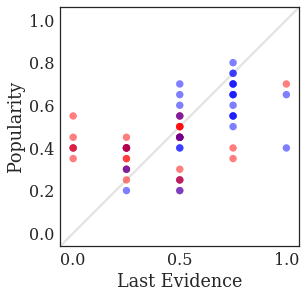

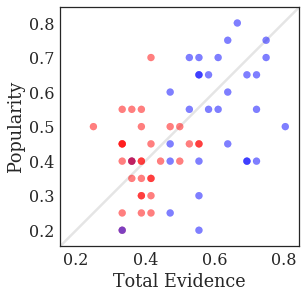

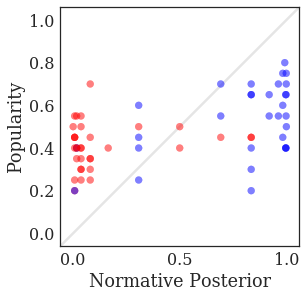

In [12]:
for exp_name in set(df['Experiment']):
    
    sub = df[df['Experiment'] == exp_name]
    
    colors = np.array(['']*len(sub['probs']))
    colors[np.array(sub['probs']) > 0.5] = 'blue'
    colors[np.array(sub['probs']) <= 0.5] = 'red'
    
    
    sns.set(context = 'paper', font_scale = 2, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})    
    fig, ax = plt.subplots()
    plt.scatter(sub['evidences'],sub['final_pops'],s=50,alpha=0.5,c=colors)
    plt.xlabel('Last Evidence')
    plt.ylabel('Popularity')
    #plt.title(exp_name.replace('-',' '))
    
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    ax.plot(lims, lims, 'k-', alpha=0.1, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    
    plt.savefig(out_dir + exp_name + 'pop-last-evidence.jpg', bbox_inches = 'tight')

    sns.set(context = 'paper', font_scale = 2, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})    
    fig, ax = plt.subplots()
    plt.scatter(sub['net_evidences'],sub['final_pops'],s=50,alpha=0.5,c=colors)
    plt.xlabel('Total Evidence')
    plt.ylabel('Popularity')
    #plt.title(exp_name.replace('-',' '))
    
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    ax.plot(lims, lims, 'k-', alpha=0.1, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    
    plt.savefig(out_dir + exp_name + 'pop-net-evidence.jpg', bbox_inches = 'tight')    

    sns.set(context = 'paper', font_scale = 2, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})    
    fig, ax = plt.subplots()    
    plt.scatter(sub['posteriors'],sub['final_pops'],s=50,alpha=0.5,c=colors)
    plt.xlabel('Normative Posterior')
    plt.ylabel('Popularity')
    #plt.title(exp_name.replace('-',' '))
    
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    ax.plot(lims, lims, 'k-', alpha=0.1, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    
    plt.savefig(out_dir + exp_name + 'pop-post.jpg', bbox_inches = 'tight')   
    
    print(exp_name)
    print('correlation with net evidence', np.corrcoef(sub['net_evidences'],sub['final_pops'])[0,1])
    print('correlation with last evidence', np.corrcoef(sub['evidences'],sub['final_pops'])[0,1])
    print('correlation with posterior', np.corrcoef(sub['posteriors'],sub['final_pops'])[0,1])
    
    print('diff from net evidence', np.mean(np.abs(sub['net_evidences'] - sub['final_pops'])**2))
    print('diff from last evidence', np.mean(np.abs(sub['evidences'] - sub['final_pops'])**2))
    print('diff from posterior', np.mean(np.abs(sub['posteriors'] - sub['final_pops'])**2))

In [10]:
pd.DataFrame({'evidence':df['net_evidences'],'last_evidence':df['evidences'],'popularity':df['final_pops'], 'game':df['nets'], 'experiment':df['exp_id']}).to_csv('evidence-pops.csv')
os.system('Rscript analyze.R > tmp')
with open('tmp') as f:
    for l in f.readlines():
        print(l)



Call:

lm(formula = d[, "popularity"] ~ d[, "evidence"] + d[, "last_evidence"] + 

    factor(d[, "experiment"]))



Residuals:

     Min       1Q   Median       3Q      Max 

-0.25208 -0.08078  0.01297  0.09579  0.23252 



Coefficients:

                                                                 Estimate

(Intercept)                                                       0.16871

d[, "evidence"]                                                   0.33669

d[, "last_evidence"]                                              0.23910

factor(d[, "experiment"])d75786f7-data-2018-01-25-big-experiment  0.03654

                                                                 Std. Error

(Intercept)                                                         0.06079

d[, "evidence"]                                                     0.13111

d[, "last_evidence"]                                                0.07039

factor(d[, "experiment"])d75786f7-data-2018-01-25-big-experiment    0.03084